In [1]:
import pandas as pd

df_facturas = pd.read_excel (r"/Users/valeriacallau/Desktop/PROYECTO_FINAL_DIPLOMADO/Datos limpios/ventas_facturacion.xlsx")
df_ventas_productos = pd.read_excel (r"/Users/valeriacallau/Desktop/PROYECTO_FINAL_DIPLOMADO/Datos limpios/ventas_productos.xlsx")

print("Facturas:")
display(df_facturas.head())
print("\nVentas por producto:")
display(df_ventas_productos.head())

df_facturas['fecha'] = pd.to_datetime(df_facturas['fecha'])
df_ventas_productos['fecha'] = pd.to_datetime(df_ventas_productos['fecha'])

fecha_inicio = '2023-08-01'
fecha_fin = '2024-11-30'

# Filtrar las tablas por el rango de fechas
df_facturas_filtrado = df_facturas[(df_facturas['fecha'] >= fecha_inicio) & (df_facturas['fecha'] <= fecha_fin)]
df_ventas_productos_filtrado = df_ventas_productos[(df_ventas_productos['fecha'] >= fecha_inicio) & (df_ventas_productos['fecha'] <= fecha_fin)]

print("\nFacturas filtradas:")
display(df_facturas_filtrado.head())
print (df_facturas_filtrado.shape[0])
print("\nVentas por producto filtradas:")
display(df_ventas_productos_filtrado.head())
print (df_ventas_productos_filtrado.shape[0])


Facturas:


,fecha,num_factura,id_cliente,cliente,total_venta,importe_base,debito_fiscal
0,2022-01-31,3103,0,GONZALO VALVERDE,565.5,565.5,73.52
1,2022-01-31,3102,0,MARCO GUERRA,110.5,110.5,14.37
2,2022-01-31,3101,0,RIVERO,208.5,208.5,27.11
3,2022-01-31,3100,0,DIAZ,68.0,68.0,8.84
4,2022-01-31,3099,0,PEDRO CAMACHO,29.0,29.0,3.77



Ventas por producto:


,fecha,id_producto,nombre_producto,cantidad,precio_unit,total_venta
0,2023-08-01,070330411425,Aceite,2.0,59.0,118.0
1,2023-08-01,1122,Arroz,2.0,240.0,480.0
2,2023-08-01,3002,Azucar,1.0,260.0,260.0
3,2023-08-01,844,Chorizo Dillmann,10.0,20.0,200.0
4,2023-08-01,7771609003121,coca cola 2 l.,13.0,7.5,97.5



Facturas filtradas:


,fecha,num_factura,id_cliente,cliente,total_venta,importe_base,debito_fiscal
12170,2023-08-31,784,4537443,NOGALES,100.0,100.0,13.00
12171,2023-08-31,783,1023267023,INSTITUTO DE R.R. ADORATRICES,234.0,234.0,30.42
12172,2023-08-31,782,1906922017,MARCO GUERRA,755.5,755.5,98.22
12173,2023-08-31,781,934950011,ORELLANA,166.0,166.0,21.58
12174,2023-08-31,780,3749302,SUAREZ,34.0,34.0,4.42


9566

Ventas por producto filtradas:


,fecha,id_producto,nombre_producto,cantidad,precio_unit,total_venta
0,2023-08-01,070330411425,Aceite,2.0,59.0,118.0
1,2023-08-01,1122,Arroz,2.0,240.0,480.0
2,2023-08-01,3002,Azucar,1.0,260.0,260.0
3,2023-08-01,844,Chorizo Dillmann,10.0,20.0,200.0
4,2023-08-01,7771609003121,coca cola 2 l.,13.0,7.5,97.5


62360


In [2]:
display(df_facturas_filtrado.tail()) 

,fecha,num_factura,id_cliente,cliente,total_venta,importe_base,debito_fiscal
21731,2024-10-01,1237,269738024,FUNDACION VIDA Y ESPERANZA,152.0,152.0,19.76
21732,2024-10-01,1236,269738024,FUNDACION VIDA Y ESPERANZA,158.0,158.0,20.54
21733,2024-10-01,1235,8001761,MENDEZ,225.0,225.0,29.25
21734,2024-10-01,1234,3764305,MARIA LUZ DORADO,90.0,90.0,11.70
21735,2024-10-01,1233,9395680,ANDREA DORADO,101.0,101.0,13.13


In [3]:
# Agrupar el total de ventas diarias a partir de la tabla de facturas filtrada
total_diario = df_facturas_filtrado.groupby('fecha')['total_venta'].sum().reset_index()

# Renombrar la columna para mayor claridad
total_diario.rename(columns={'total_venta': 'total_venta_diaria'}, inplace=True)

# Mostrar un resumen del total diario
print("Total diario de ventas:")
display(total_diario.head())
print(total_diario.shape)


Total diario de ventas:


,fecha,total_venta_diaria
0,2023-08-01,5457.50
1,2023-08-02,4157.25
2,2023-08-03,2312.00
3,2023-08-04,4264.50
4,2023-08-05,12345.80


(397, 2)


In [4]:
# Unir la tabla de ventas por producto con el total diario mediante la fecha
df_proporciones = df_ventas_productos_filtrado.merge(total_diario, on='fecha')

# Calcular la proporción de cada producto respecto al total diario
df_proporciones['proporcion_venta'] = df_proporciones['total_venta'] / df_proporciones['total_venta_diaria']

# Mostrar un resumen de la tabla resultante
print("Proporciones de venta por producto:")
display(df_proporciones.head())


Proporciones de venta por producto:


,fecha,id_producto,nombre_producto,cantidad,precio_unit,total_venta,total_venta_diaria,proporcion_venta
0,2023-08-01,070330411425,Aceite,2.0,59.0,118.0,5457.5,0.021622
1,2023-08-01,1122,Arroz,2.0,240.0,480.0,5457.5,0.087952
2,2023-08-01,3002,Azucar,1.0,260.0,260.0,5457.5,0.047641
3,2023-08-01,844,Chorizo Dillmann,10.0,20.0,200.0,5457.5,0.036647
4,2023-08-01,7771609003121,coca cola 2 l.,13.0,7.5,97.5,5457.5,0.017865


In [5]:
# Calcular las métricas estadísticas para la columna de proporción de venta
precio_promedio = df_proporciones['proporcion_venta'].mean()
precio_minimo = df_proporciones['proporcion_venta'].min()
precio_maximo = df_proporciones['proporcion_venta'].max()

# Mostrar los resultados
print("Rango de proporciones de venta por producto:")
print(f"Promedio: {precio_promedio}")
print(f"Mínimo: {precio_minimo}")
print(f"Máximo: {precio_maximo}")


Rango de proporciones de venta por producto:
Promedio: 0.007110070257093968
Mínimo: 7.773873565720327e-06
Máximo: 3.8095238095238093


In [6]:
# Filtrar las filas donde la proporción de venta es mayor a 1
fechas_proporcion_superior_a_1 = df_proporciones[df_proporciones['proporcion_venta'] > 1]

# Mostrar las fechas correspondientes
print("Fechas con proporción de venta superior a 1:")
display(fechas_proporcion_superior_a_1)


Fechas con proporción de venta superior a 1:


,fecha,id_producto,nombre_producto,cantidad,precio_unit,total_venta,total_venta_diaria,proporcion_venta
51636,2024-08-03,7773103001535,Aceite FINO 5 lts.,1.0,58.5,58.5,42.0,1.392857
51637,2024-08-03,7750243052061,Bolivar 4 Kg.,1.0,65.0,65.0,42.0,1.547619
51641,2024-08-03,254,Leche entere en polvo instantanea PIL 760g,1.0,58.0,58.0,42.0,1.380952
51643,2024-08-03,1245,Mantequilla PIL con sal 200g,3.0,17.0,51.0,42.0,1.214286
51649,2024-08-03,7751493010870,Huggies pañal.,1.0,126.5,126.5,42.0,3.011905
51668,2024-08-03,209,Leche entera en polvo instantantanea PIL,1.0,54.5,54.5,42.0,1.297619
51674,2024-08-03,967,Casa Real Negro,1.0,68.0,68.0,42.0,1.619048
51677,2024-08-03,7754111532020,Boligrafo Faber Castell,24.0,4.0,96.0,42.0,2.285714
51680,2024-08-03,734484105936,MARCADOR DE AGUA,12.0,4.0,48.0,42.0,1.142857
51682,2024-08-03,7891173022882,Paquete Hojas Bond t/Carta,4.0,40.0,160.0,42.0,3.809524


In [7]:
# Eliminar las filas donde la proporción de venta es superior a 1
df_proporciones = df_proporciones[df_proporciones['proporcion_venta'] <= 1]

# Mostrar el DataFrame actualizado
print("DataFrame después de eliminar filas con proporción de venta superior a 1:")
display(df_proporciones)


DataFrame después de eliminar filas con proporción de venta superior a 1:


,fecha,id_producto,nombre_producto,cantidad,precio_unit,total_venta,total_venta_diaria,proporcion_venta
0,2023-08-01,070330411425,Aceite,2.0,59.0,118.0,5457.5,0.021622
1,2023-08-01,1122,Arroz,2.0,240.0,480.0,5457.5,0.087952
2,2023-08-01,3002,Azucar,1.0,260.0,260.0,5457.5,0.047641
3,2023-08-01,844,Chorizo Dillmann,10.0,20.0,200.0,5457.5,0.036647
4,2023-08-01,7771609003121,coca cola 2 l.,13.0,7.5,97.5,5457.5,0.017865
...,...,...,...,...,...,...,...,...
62306,2024-10-31,70000000256981,Mortadela,1.0,15.0,15.0,8361.5,0.001794
62307,2024-10-31,7779970677101,OLA AROMATIC limpiador desinfectante,1.0,15.0,15.0,8361.5,0.001794
62308,2024-10-31,3001,Pan,6.0,0.5,3.0,8361.5,0.000359
62309,2024-10-31,7775022070012,Pañales Cariñocito G,1.0,52.0,52.0,8361.5,0.006219


In [8]:
# Muestra el número de filas y columnas en el DataFrame
print(f"El DataFrame tiene {df_proporciones.shape[0]} filas y {df_proporciones.shape[1]} columnas.")


El DataFrame tiene 62296 filas y 8 columnas.


In [9]:
# Calcular las métricas estadísticas para la columna de proporción de venta
precio_promedio = df_proporciones['proporcion_venta'].mean()
precio_minimo = df_proporciones['proporcion_venta'].min()
precio_maximo = df_proporciones['proporcion_venta'].max()

# Mostrar los resultados
print("Rango de proporciones de venta por producto:")
print(f"Promedio: {precio_promedio}")
print(f"Mínimo: {precio_minimo}")
print(f"Máximo: {precio_maximo}")

Rango de proporciones de venta por producto:
Promedio: 0.006628299412012564
Mínimo: 7.773873565720327e-06
Máximo: 1.0


In [10]:
# Cargar la tabla de productos
df_productos = pd.read_excel(r"/Users/valeriacallau/Desktop/PROYECTO_FINAL_DIPLOMADO/Datos limpios/productos.xlsx")
# Mostrar un resumen de la tabla de productos
print("Tabla de productos:")
display(df_productos.head())


Tabla de productos:


,id_producto,nombre_producto,Precio
0,7790580343507,Arcos Delicias,36.0
1,7775602130020,BOLSAS de BASURA 65X80 Cm,8.5
2,77700005487,Crema Corporal dinazul,13.0
3,7775000009089,Detergente Ola Limon160g,3.0
4,7500435019880,Head & Shoulders Manzana Fresh,40.0


In [11]:
# Eliminar duplicados en la tabla de productos
df_productos = df_productos.drop_duplicates(subset='id_producto')

# Unir la tabla de proporciones con la tabla de productos
df_proporciones_productos = df_proporciones.merge(df_productos, on='id_producto', how='left')

# Eliminar una de las columnas de nombre duplicadas
df_proporciones_productos = df_proporciones_productos.drop(columns=['nombre_producto_x'])

# Renombrar la columna restante
df_proporciones_productos = df_proporciones_productos.rename(columns={'nombre_producto_y': 'nombre_producto'})

# Reordenar las columnas para que nombre_producto esté al lado de id_producto
columnas_ordenadas = ['fecha', 'id_producto', 'nombre_producto'] + [col for col in df_proporciones_productos.columns if col not in ['fecha', 'id_producto', 'nombre_producto']]
df_proporciones_productos = df_proporciones_productos[columnas_ordenadas]

# Mostrar un resumen del resultado
print("Tabla de proporciones cruzada con productos:")
display(df_proporciones_productos.head())


Tabla de proporciones cruzada con productos:


,fecha,id_producto,nombre_producto,cantidad,precio_unit,total_venta,total_venta_diaria,proporcion_venta,Precio
0,2023-08-01,070330411425,Aceite,2.0,59.0,118.0,5457.5,0.021622,11.0
1,2023-08-01,1122,Arroz,2.0,240.0,480.0,5457.5,0.087952,4.0
2,2023-08-01,3002,Azucar,1.0,260.0,260.0,5457.5,0.047641,3.5
3,2023-08-01,844,Chorizo Dillmann,10.0,20.0,200.0,5457.5,0.036647,20.0
4,2023-08-01,7771609003121,coca cola 2 l.,13.0,7.5,97.5,5457.5,0.017865,10.0


In [12]:
df_proporciones_productos.shape[0]

62296

In [13]:
# Agrupar por id_producto y calcular las métricas solicitadas
df_indicadores = df_proporciones_productos.groupby('id_producto').agg({
    'proporcion_venta': 'mean',       # Promedio de proporción
    'cantidad': 'sum',           # Suma de la cantidad total vendida
    'precio_unit': 'mean'         # Precio promedio
}).reset_index()

# Renombrar las columnas para mayor claridad
df_indicadores.rename(columns={
    'proporcion_venta': 'proporcion_promedio',
    'cantidad': 'cantidad_total_vendida',
    'precio_unit': 'precio_promedio'
}, inplace=True)

# Mostrar un resumen del resultado final
print("Indicadores finales por producto:")
display(df_indicadores.head())
display(df_indicadores.tail())

Indicadores finales por producto:


,id_producto,proporcion_promedio,cantidad_total_vendida,precio_promedio
0,",7790580178208",0.005705,1.0,23.500000
1,.7771501000143,0.009128,2.0,30.250000
2,.7772905004010,0.025334,1.0,74.000000
3,.7774904401753,0.001037,1.0,18.000000
4,0,0.041385,15.0,121.833333


,id_producto,proporcion_promedio,cantidad_total_vendida,precio_promedio
4919,uvapasa,0.001343,4.0,4.375000
4920,yute,0.001154,6.0,1.000000
4921,º,0.037977,2.0,56.500000
4922,º7779970670355,0.029559,1.0,68.000000
4923,Ç7771207000843,0.003116,51.0,10.576923


In [14]:
df_indicadores.shape[0]

4924

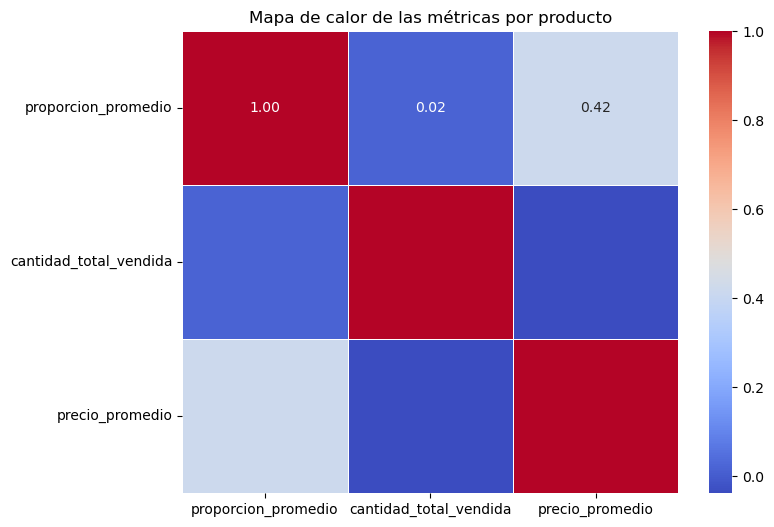

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar y limpiar datos (asegúrate de que no haya valores nulos o no numéricos)
variables_seleccionadas = ['proporcion_promedio', 'cantidad_total_vendida', 'precio_promedio']
df_indicadores0 = df_indicadores[variables_seleccionadas].dropna()

# Calcular la matriz de correlación
matriz_correlacion = df_indicadores0.corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de las métricas por producto")
plt.show()


In [16]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas relevantes
datos_cluster = df_indicadores[['proporcion_promedio', 'cantidad_total_vendida', 'precio_promedio']]

# Estandarizar los datos
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(datos_cluster)


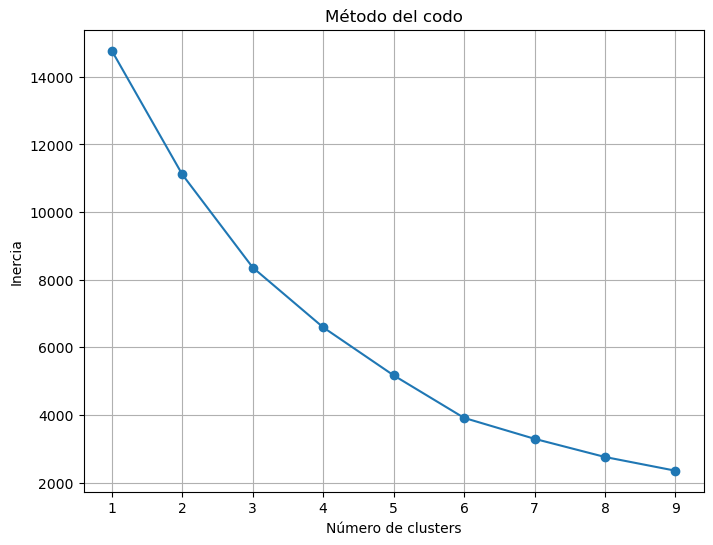

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Lista para almacenar las inerciones (suma de las distancias cuadradas dentro de los clusters)
inertias = []

# Probar con diferentes números de clusters (k)
for k in range(1, 10): 
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  
    kmeans.fit(datos_normalizados)  
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertias, marker='o')
plt.title("Método del codo")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()



In [18]:
# Entrenamiento del modelo K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_indicadores['cluster'] = kmeans.fit_predict(datos_normalizados)

# Selección de columnas numéricas para el cálculo de promedios
columnas_numericas = df_indicadores.select_dtypes(include=['number']).columns

# Agrupación por cluster y cálculo del promedio de las columnas numéricas
promedios_clusters = df_indicadores.groupby('cluster')[columnas_numericas].mean()

# Mostrar resultados
print("Promedios por cluster:")
print(promedios_clusters)


Promedios por cluster:
         proporcion_promedio  cantidad_total_vendida  precio_promedio  cluster
cluster                                                                       
0                   0.005406               29.310185        13.962510      0.0
1                   0.034229               22.387097        75.001440      1.0
2                   0.003052             8166.500000         5.357143      2.0


In [19]:
# Contar la cantidad de elementos por cluster
conteo_clusters = df_indicadores['cluster'].value_counts()

# Mostrar los resultados
print("Cantidad de elementos por cluster:")
print(conteo_clusters)


Cantidad de elementos por cluster:
cluster
0    4644
1     279
2       1
Name: count, dtype: int64


In [20]:
from sklearn.metrics import silhouette_score

# Calcular el coeficiente de Silhouette
silhouette_avg = silhouette_score(datos_normalizados, df_indicadores['cluster'])

print(f"El coeficiente de Silhouette es: {silhouette_avg:.4f}")


El coeficiente de Silhouette es: 0.7500


In [21]:
# Calcular estadísticas descriptivas para cada cluster
cluster_stats = df_indicadores.groupby('cluster').agg({
    'proporcion_promedio': ['mean', 'min', 'max', 'std'],
    'cantidad_total_vendida': ['mean', 'min', 'max', 'std'],
    'precio_promedio': ['mean', 'min', 'max', 'std']
})

# Mostrar las estadísticas descriptivas
print("Características de cada cluster:")
display(cluster_stats)


Características de cada cluster:


proporcion_promedio                                \
                       mean       min       max       std   
cluster                                                     
0                  0.005406  0.000032  0.044541  0.004889   
1                  0.034229  0.004215  0.476190  0.039082   
2                  0.003052  0.003052  0.003052       NaN   

        cantidad_total_vendida                             precio_promedio  \
                          mean     min     max         std            mean   
cluster                                                                      
0                    29.310185     1.0  2225.0  104.215558       13.962510   
1                    22.387097     1.0  1065.0   81.071782       75.001440   
2                  8166.500000  8166.5  8166.5         NaN        5.357143   

                                          
              min         max        std  
cluster                                   
0        0.500000   60.000000  10.334853  
1        1.500000  345.000000  49.687215  
2        5.357143    5.357143        NaN

In [22]:
# Filtrar los productos que pertenecen al cluster 2
productos_cluster_2 = df_indicadores[df_indicadores['cluster'] == 2]

# Hacer un merge con la tabla 'productos' para obtener los nombres
productos_con_nombres_cluster_2 = pd.merge(
    productos_cluster_2[['id_producto']],  
    df_productos, 
    on='id_producto',  
    how='left'  
)


print("Nombres de los productos en el cluster 2:")
print(productos_con_nombres_cluster_2[['id_producto', 'nombre_producto']])

Nombres de los productos en el cluster 2:
  id_producto nombre_producto
0        3001             Pan


In [23]:
# ID del producto 'pan'
id_pan = '3001' 

# Eliminar el producto 'pan' de df_indicadores
df_indicadores_sin_pan = df_indicadores[df_indicadores['id_producto'] != id_pan] 
print("Dimensiones después de eliminar el producto 'pan':", df_indicadores_sin_pan.shape)



Dimensiones después de eliminar el producto 'pan': (4923, 5)


In [24]:
# Seleccionar las columnas relevantes
datos_cluster2 = df_indicadores_sin_pan[['proporcion_promedio', 'cantidad_total_vendida', 'precio_promedio']]

# Estandarizar los datos
scaler = StandardScaler()
datos_normalizados2 = scaler.fit_transform(datos_cluster2)

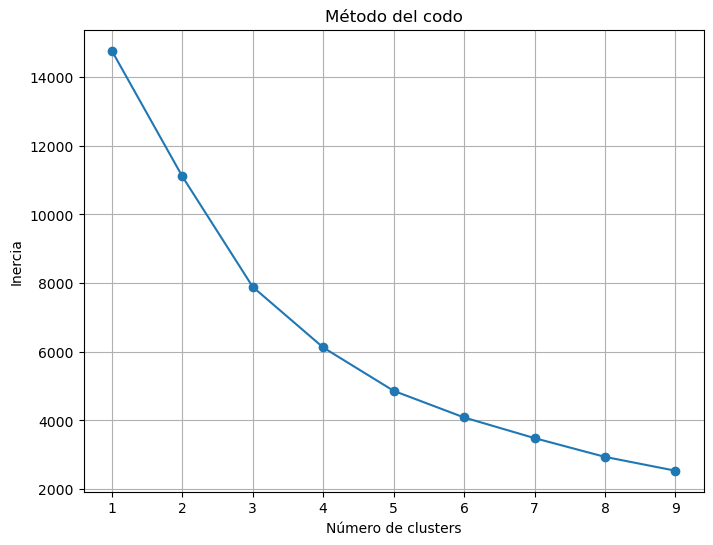

In [25]:

inertias = []

# Probar con diferentes números de clusters (k)
for k in range(1, 10): 
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  
    kmeans.fit(datos_normalizados2)  
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertias, marker='o')
plt.title("Método del codo")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()

In [26]:

# Entrenamiento del modelo K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_indicadores_sin_pan['cluster'] = kmeans.fit_predict(datos_normalizados2)  

# Selección de columnas numéricas para el cálculo de promedios
columnas_numericas = df_indicadores_sin_pan.select_dtypes(include=['number']).columns  

# Agrupación por cluster y cálculo del promedio de las columnas numéricas
promedios_clusters = df_indicadores_sin_pan.groupby('cluster')[columnas_numericas].mean()  

# Mostrar resultados
print("Promedios por cluster:")
print(promedios_clusters)


Promedios por cluster:
         proporcion_promedio  cantidad_total_vendida  precio_promedio  cluster
cluster                                                                       
0                   0.005383               21.639865        13.980356      0.0
1                   0.009043              949.625000        15.891025      1.0
2                   0.034502               16.949091        75.309727      2.0


/var/folders/ss/dl57ksf137n5kw0fhyfb2kv00000gn/T/ipykernel_22658/3901235364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indicadores_sin_pan['cluster'] = kmeans.fit_predict(datos_normalizados2)


In [27]:

conteo_clusters = df_indicadores_sin_pan['cluster'].value_counts()

# Mostrar los resultados
print("Cantidad de elementos por cluster:")
print(conteo_clusters)


Cantidad de elementos por cluster:
cluster
0    4608
2     275
1      40
Name: count, dtype: int64


In [28]:
# Calcular estadísticas descriptivas para cada cluster
cluster_stats = df_indicadores_sin_pan.groupby('cluster').agg({
    'proporcion_promedio': ['mean', 'min', 'max', 'std'],
    'cantidad_total_vendida': ['mean', 'min', 'max', 'std'],
    'precio_promedio': ['mean', 'min', 'max', 'std']
})

# Mostrar las estadísticas descriptivas
print("Características de cada cluster:")
display(cluster_stats)



Características de cada cluster:


proporcion_promedio                                \
                       mean       min       max       std   
cluster                                                     
0                  0.005383  0.000032  0.044541  0.004878   
1                  0.009043  0.001850  0.026382  0.005964   
2                  0.034502  0.004215  0.476190  0.039292   

        cantidad_total_vendida                            precio_promedio  \
                          mean    min     max         std            mean   
cluster                                                                     
0                    21.639865    1.0   480.0   46.978443       13.980356   
1                   949.625000  495.0  2225.0  435.580893       15.891025   
2                    16.949091    1.0   310.0   43.071630       75.309727   

                                     
         min         max        std  
cluster                              
0        0.5   60.000000  10.347251  
1        1.0   58.356452  15.237677  
2        1.5  345.000000  49.975081

In [29]:
from sklearn.metrics import silhouette_score

# Calcular el coeficiente de Silhouette
silhouette_avg = silhouette_score(datos_normalizados2, df_indicadores_sin_pan['cluster'])

print(f"El coeficiente de Silhouette es: {silhouette_avg:.4f}")


El coeficiente de Silhouette es: 0.7479


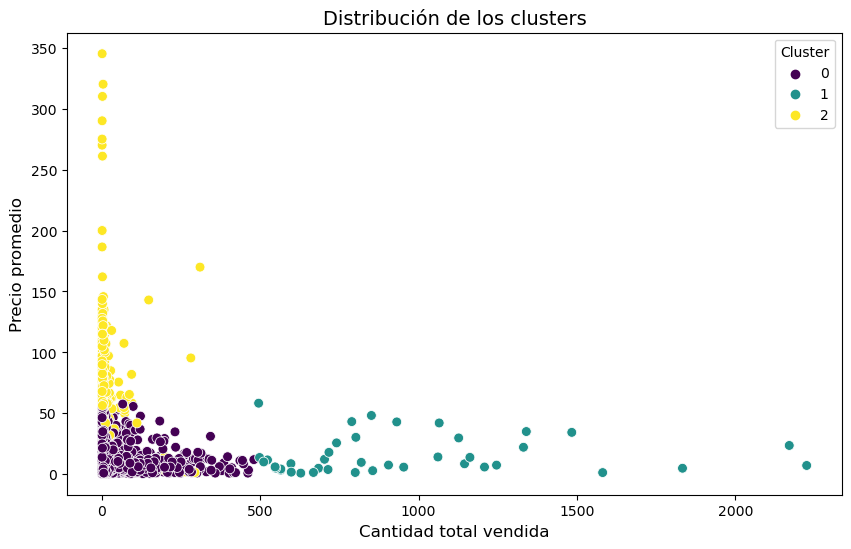

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la gráfica de dispersión (scatter plot)
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df_indicadores_sin_pan, 
    x='cantidad_total_vendida', 
    y='precio_promedio', 
    hue='cluster', 
    palette='viridis',  # Paleta de colores
    s=50  # Tamaño de los puntos
)

# Personalizar el gráfico
scatter.set_title('Distribución de los clusters', fontsize=14)
scatter.set_xlabel('Cantidad total vendida', fontsize=12)
scatter.set_ylabel('Precio promedio', fontsize=12)
scatter.legend(title='Cluster', loc='upper right')

# Mostrar la gráfica
plt.show()


In [31]:
# Calcular estadísticas descriptivas para cada cluster
cluster_stats = df_indicadores_sin_pan.groupby('cluster').agg({
    'proporcion_promedio': ['mean', 'min', 'max', 'std'],
    'cantidad_total_vendida': ['mean', 'min', 'max', 'std'],
    'precio_promedio': ['mean', 'min', 'max', 'std']
})

# Mostrar las estadísticas descriptivas
print("Características de cada cluster:")
display(cluster_stats)

Características de cada cluster:


proporcion_promedio                                \
                       mean       min       max       std   
cluster                                                     
0                  0.005383  0.000032  0.044541  0.004878   
1                  0.009043  0.001850  0.026382  0.005964   
2                  0.034502  0.004215  0.476190  0.039292   

        cantidad_total_vendida                            precio_promedio  \
                          mean    min     max         std            mean   
cluster                                                                     
0                    21.639865    1.0   480.0   46.978443       13.980356   
1                   949.625000  495.0  2225.0  435.580893       15.891025   
2                    16.949091    1.0   310.0   43.071630       75.309727   

                                     
         min         max        std  
cluster                              
0        0.5   60.000000  10.347251  
1        1.0   58.356452  15.237677  
2        1.5  345.000000  49.975081

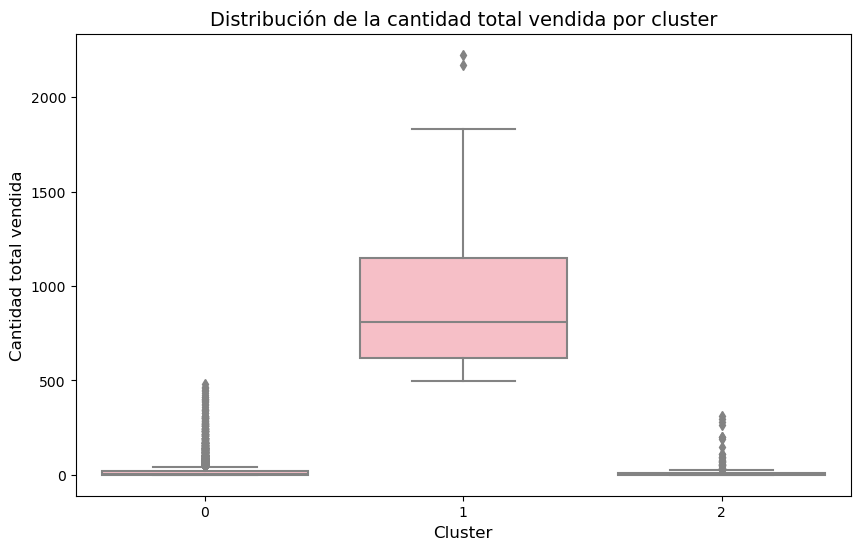

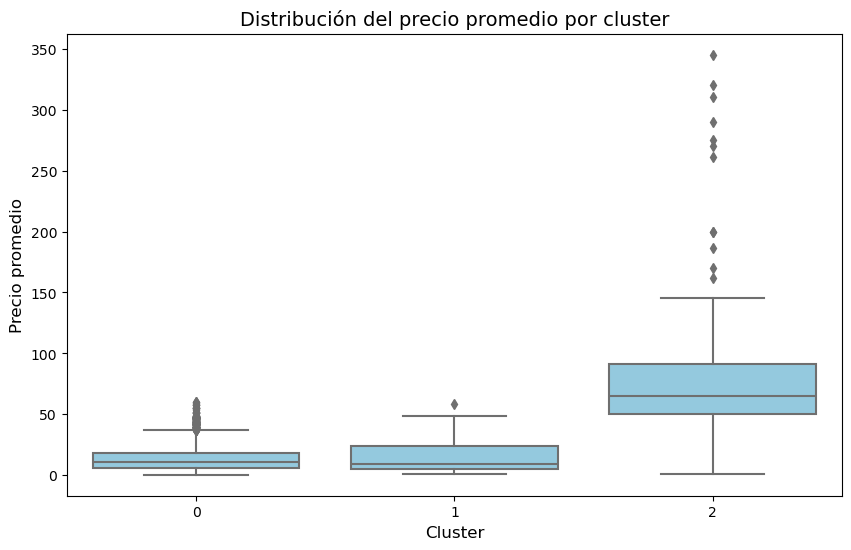

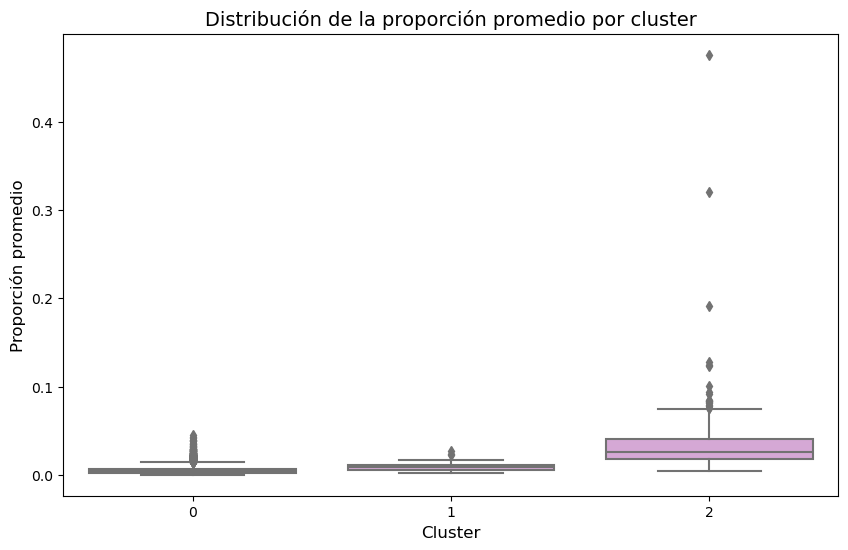

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un boxplot para 'cantidad_total_vendida' con color rosado
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_indicadores_sin_pan, x='cluster', y='cantidad_total_vendida', palette=['#FFB6C1'])  # Rosa claro
plt.title('Distribución de la cantidad total vendida por cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Cantidad total vendida', fontsize=12)
plt.show()

# Crear un boxplot para 'precio_promedio' con color celeste
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_indicadores_sin_pan, x='cluster', y='precio_promedio', palette=['#87CEEB'])  # Celeste
plt.title('Distribución del precio promedio por cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Precio promedio', fontsize=12)
plt.show()

# Crear un boxplot para 'proporcion_promedio' con color lila
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_indicadores_sin_pan, x='cluster', y='proporcion_promedio', palette=['#DDA0DD'])  # Lila
plt.title('Distribución de la proporción promedio por cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Proporción promedio', fontsize=12)
plt.show()



In [33]:
# Filtrar los productos del cluster 1
productos_cluster_1 = df_indicadores_sin_pan[df_indicadores_sin_pan['cluster'] == 1]

# Ordenar por la cantidad total vendida en orden descendente
productos_cluster_1 = productos_cluster_1.sort_values(by='cantidad_total_vendida', ascending=False)

# Seleccionar el top 5
top_5_productos_cluster_1 = productos_cluster_1.head(5)

# Unir con la tabla de productos para obtener los nombres
top_5_productos_cluster_1_con_nombre = top_5_productos_cluster_1.merge(
    df_productos,  # Tu tabla de productos con nombres
    on='id_producto',  # Clave común entre ambas tablas
    how='left'  # Unión para mantener solo los productos que están en el cluster
)

# Seleccionar columnas relevantes para mostrar
resultado_top_5 = top_5_productos_cluster_1_con_nombre[['id_producto', 'nombre_producto', 'cantidad_total_vendida', 'precio_promedio']]

# Mostrar el resultado
print("Top 5 productos del cluster 1 con más historial de ventas:")
display(resultado_top_5)

Top 5 productos del cluster 1 con más historial de ventas:


,id_producto,nombre_producto,cantidad_total_vendida,precio_promedio
0,3333,Masitas,2225.0,7.267016
1,77852255,Huevo,2170.0,23.688179
2,889,Coca Cola 500 ml,1833.0,5.000000
3,7771259756392,Chicolac Pil,1581.0,1.436019
4,3015,Queso,1483.5,34.425762


In [34]:
# Filtrar los productos del cluster 2
productos_cluster_2 = df_indicadores_sin_pan[df_indicadores_sin_pan['cluster'] == 2]

# Ordenar por la cantidad total vendida en orden descendente
productos_cluster_2 = productos_cluster_2.sort_values(by='cantidad_total_vendida', ascending=False)

# Seleccionar el top 5
top_5_productos_cluster_2 = productos_cluster_2.head(5)

# Unir con la tabla de productos para obtener los nombres
top_5_productos_cluster_2_con_nombre = top_5_productos_cluster_2.merge(
    df_productos,  
    on='id_producto',  
    how='left'  
)

# Seleccionar columnas relevantes para mostrar
resultado_top_5 = top_5_productos_cluster_2_con_nombre[['id_producto', 'nombre_producto', 'cantidad_total_vendida','precio_promedio']]

# Mostrar el resultado
print("Top 5 productos del cluster 1 con más historial de ventas:")
display(resultado_top_5)

Top 5 productos del cluster 1 con más historial de ventas:


,id_producto,nombre_producto,cantidad_total_vendida,precio_promedio
0,20222022,MATERIAL DE ESCRITORIO,310.0,169.961935
1,7773435370194,masita,294.0,1.500000
2,78911773022930,Pqte. Folders,281.0,95.455696
3,7772106007902,pepsi 250 ml,264.0,2.000000
4,7771608002002,Agua viscachani 600 ml.,200.0,3.000000


In [35]:
# Guardar el DataFrame con los clusters en un archivo Excel
df_indicadores_sin_pan.to_excel("clusterizacion_de_productos_por_ventas1.xlsx", index=False)

print("Archivo 'clusterizacion_de_productos_por_ventas.xlsx' guardado con éxito.")



Archivo 'clusterizacion_de_productos_por_ventas.xlsx' guardado con éxito.
